In [1]:
import torch
import torchtext
from torchtext import datasets

import spacy 

import re
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
tweets = pd.read_csv('datasets/tweets/tweets.csv', error_bad_lines = False)
tweets.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,neg,Sentiment140,is so sad for my APL frie...
1,2,neg,Sentiment140,I missed the New Moon trail...
2,3,pos,Sentiment140,omg its already 7:30 :O
3,4,neg,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I've been at...
4,5,neg,Sentiment140,i think mi bf is cheating on me!!! ...


In [3]:
tweets = tweets.drop(columns = ['ItemID', 'SentimentSource'], axis = 1)
tweets.head()

,Sentiment,SentimentText
0,neg,is so sad for my APL frie...
1,neg,I missed the New Moon trail...
2,pos,omg its already 7:30 :O
3,neg,.. Omgaga. Im sooo im gunna CRy. I've been at...
4,neg,i think mi bf is cheating on me!!! ...


In [4]:
tweets.shape

(50000, 2)

In [5]:
tweets['Sentiment'].unique()

array(['neg', 'pos'], dtype=object)

In [6]:
tweets.Sentiment.value_counts()

pos    26921
neg    23079
Name: Sentiment, dtype: int64

[Text(0.5, 0, 'Labels')]

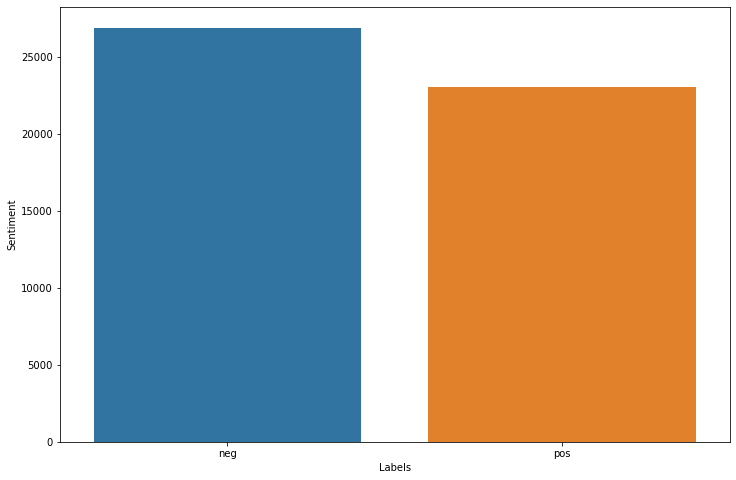

In [7]:
fig = plt.figure(figsize=(12, 8))
ax = sns.barplot(x=tweets.Sentiment.unique(), y=tweets.Sentiment.value_counts())
ax.set(xlabel='Labels')

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(tweets, test_size=0.2, random_state=42)

In [9]:
train.reset_index(drop=True), test.reset_index(drop=True)

(      Sentiment                                      SentimentText
 0           pos  @amyrenea omg so am I lol I fell asleep when i...
 1           neg               @Adrienne_Bailon I want a shout out 
 2           neg  @Anonymousboy03 Plans for school stuff &amp; a...
 3           neg  ... has hit a writer's block .. am loosing my ...
 4           neg  ... trying to find people I know! I`m bored, i...
 ...         ...                                                ...
 39995       pos   #robotpickuplines are so funny. check them out. 
 39996       pos  @annyo84 awh thankss.  yeah, i understand what...
 39997       pos  @AmbiguityX ohh you're in twin cities?  i luv ...
 39998       neg   Dinara lost again in Roland Garros. Why the S...
 39999       pos  *yawn* fucking time zones shit. I'm really sic...
 
 [40000 rows x 2 columns],
      Sentiment                                      SentimentText
 0          pos  @aimeesays aww i hope it does fly by because J...
 1          neg  #don

In [10]:
train.head()

,Sentiment,SentimentText
39087,pos,@amyrenea omg so am I lol I fell asleep when i...
30893,neg,@Adrienne_Bailon I want a shout out
45278,neg,@Anonymousboy03 Plans for school stuff &amp; a...
16398,neg,... has hit a writer's block .. am loosing my ...
13653,neg,"... trying to find people I know! I`m bored, i..."


In [11]:
train.shape, test.shape

((40000, 2), (10000, 2))

In [12]:
train.to_csv('datasets/tweets/train_tweets.csv', index=False)
test.to_csv('datasets/tweets/test_tweets.csv', index=False)

In [13]:
def tweet_clean(text):
    
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text) 
    text = re.sub(r'https?:/\/\S+', ' ', text) 
    
    return text.strip()

In [14]:
nlp = spacy.load("en_core_web_sm")
def tokenizer(s): 
    return [w.text.lower() for w in nlp(tweet_clean(s))]

In [15]:
text = torchtext.legacy.data.Field(tokenize = tokenizer)
label = torchtext.legacy.data.LabelField(dtype = torch.float)

In [16]:
datafields = [('Sentiment', label), ('SentimentText', text)]

In [17]:
trn, tst = torchtext.legacy.data.TabularDataset.splits(path = 'datasets/tweets/', 
train = 'train_tweets.csv',
test = 'test_tweets.csv',    
format = 'csv',
skip_header = True,
fields = datafields)

In [18]:
print(f'Number of training examples: {len(trn)}')
print(f'Number of testing examples: {len(tst)}')

Number of training examples: 40000
Number of testing examples: 10000


In [19]:
vars(trn.examples[0])

{'Sentiment': 'pos',
 'SentimentText': ['amyrenea',
  'omg',
  'so',
  'am',
  'i',
  'lol',
  'i',
  'fell',
  'asleep',
  'when',
  'it',
  'was',
  'on',
  'last',
  'night',
  'so',
  'now',
  'i',
  'get',
  'to',
  'finish',
  'it']}

In [20]:
vars(tst.examples[0])

{'Sentiment': 'pos',
 'SentimentText': ['aimeesays',
  'aww',
  'i',
  'hope',
  'it',
  'does',
  'fly',
  'by',
  'because',
  'jt',
  'episodes',
  'are',
  'usually',
  'really',
  'good',
  'and',
  'it',
  's',
  'early',
  'but',
  'so',
  'far',
  'this',
  'ep',
  'hassn',
  't',
  'disappointed']}

In [21]:
text.build_vocab(trn, max_size=25000,
                 vectors="glove.6B.100d",
                 unk_init=torch.Tensor.normal_)

label.build_vocab(trn)

In [22]:
print(text.vocab.freqs.most_common(50))

[('i', 25644), ('the', 12219), ('to', 12111), ('you', 10723), ('a', 9197), ('it', 8440), ('and', 6889), ('my', 6208), ('quot', 5582), ('s', 5565), ('that', 5306), ('is', 5203), ('for', 4971), ('in', 4852), ('t', 4844), ('m', 4683), ('me', 4588), ('of', 4331), ('on', 3918), ('have', 3752), ('so', 3612), ('but', 3506), ('be', 2932), ('not', 2887), ('was', 2775), ('just', 2724), ('can', 2523), ('do', 2418), ('are', 2351), ('your', 2320), ('with', 2269), ('good', 2203), ('like', 2173), ('at', 2131), ('no', 2119), ('this', 2094), ('all', 2069), ('up', 2066), ('now', 2063), ('get', 2044), ('we', 1988), ('u', 1890), ('love', 1885), ('lol', 1864), ('too', 1826), ('what', 1760), ('out', 1742), ('know', 1664), ('nt', 1608), ('amp', 1539)]


In [23]:
train_iterator, test_iterator = torchtext.legacy.data.BucketIterator.splits((trn, tst), batch_size = 64,
sort_key=lambda x: len(x.SentimentText), sort_within_batch=False)

In [24]:
import torch.nn as nn

class RNN(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.GRU(embedding_dim, hidden_dim, num_layers = n_layers, bidirectional = bidirectional, dropout=dropout)
        self.fc = nn.Linear(hidden_dim*2, output_dim)
        self.dropout = nn.Dropout(dropout)

        
    def forward(self, text):
        embedded = self.dropout(self.embedding(text))
        output, hidden = self.rnn(embedded)
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        return self.fc(hidden.squeeze(0))

In [25]:
input_dim = len(text.vocab)

embedding_dim = 100

hidden_dim = 20
output_dim = 1

n_layers = 2
bidirectional = True

dropout = 0.5

In [26]:
model = RNN(input_dim, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout)
model

RNN(
  (embedding): Embedding(25002, 100)
  (rnn): GRU(100, 20, num_layers=2, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=40, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [27]:
pretrained_embeddings = text.vocab.vectors
# print(pretrained_embeddings.shape)

model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[ 0.6661, -1.2720, -0.3239,  ..., -0.2182, -1.2850,  1.3289],
        [ 0.8026,  0.6085,  1.7688,  ...,  0.4632, -1.7075,  2.9299],
        [-0.0465,  0.6197,  0.5665,  ..., -0.3762, -0.0325,  0.8062],
        ...,
        [ 0.9792,  0.9173,  0.7819,  ..., -0.6893,  1.5107,  0.9757],
        [-1.2770, -0.7223, -0.3658,  ...,  0.9954, -1.2903,  0.7529],
        [ 0.8282,  1.9540,  0.6708,  ...,  1.8905, -0.1854, -0.7622]])

In [28]:
unk_idx = text.vocab.stoi[text.unk_token]
pad_idx = text.vocab.stoi[text.pad_token]

model.embedding.weight.data[unk_idx] = torch.zeros(embedding_dim)
model.embedding.weight.data[pad_idx] = torch.zeros(embedding_dim)

print(model.embedding.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0465,  0.6197,  0.5665,  ..., -0.3762, -0.0325,  0.8062],
        ...,
        [ 0.9792,  0.9173,  0.7819,  ..., -0.6893,  1.5107,  0.9757],
        [-1.2770, -0.7223, -0.3658,  ...,  0.9954, -1.2903,  0.7529],
        [ 0.8282,  1.9540,  0.6708,  ...,  1.8905, -0.1854, -0.7622]])


In [29]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()

In [30]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        predictions = model(batch.SentimentText).squeeze(1)
        loss = criterion(predictions, batch.Sentiment)
        
        rounded_preds = torch.round(torch.sigmoid(predictions))
        correct = (rounded_preds == batch.Sentiment).float() 
        
        acc = correct.sum() / len(correct)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [31]:
num_epochs = 10

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% |')

| Epoch: 01 | Train Loss: 0.633 | Train Acc: 63.11% |
| Epoch: 02 | Train Loss: 0.538 | Train Acc: 73.62% |
| Epoch: 03 | Train Loss: 0.497 | Train Acc: 76.27% |
| Epoch: 04 | Train Loss: 0.465 | Train Acc: 78.41% |
| Epoch: 05 | Train Loss: 0.444 | Train Acc: 79.40% |
| Epoch: 06 | Train Loss: 0.426 | Train Acc: 80.66% |
| Epoch: 07 | Train Loss: 0.409 | Train Acc: 81.70% |
| Epoch: 08 | Train Loss: 0.387 | Train Acc: 82.95% |
| Epoch: 09 | Train Loss: 0.376 | Train Acc: 83.58% |
| Epoch: 10 | Train Loss: 0.365 | Train Acc: 84.21% |


In [32]:
epoch_loss = 0
epoch_acc = 0

In [33]:
model.eval()

RNN(
  (embedding): Embedding(25002, 100)
  (rnn): GRU(100, 20, num_layers=2, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=40, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [34]:
with torch.no_grad():
    for batch in test_iterator:
        predictions = model(batch.SentimentText).squeeze(1)
        loss = criterion(predictions, batch.Sentiment)
        rounded_preds = torch.round(torch.sigmoid(predictions))
        correct = (rounded_preds == batch.Sentiment).float() 
        
        acc = correct.sum()/len(correct)

        epoch_loss += loss.item()
        epoch_acc += acc.item()


test_loss = epoch_loss / len(test_iterator)
test_acc = epoch_acc / len(test_iterator)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.500 | Test Acc: 76.90%


In [35]:
def evaltext(sentence):
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    indexed = [text.vocab.stoi[t] for t in tokenized]

    tensor = torch.LongTensor(indexed)
    tensor = tensor.unsqueeze(1)

    prediction = torch.sigmoid(model(tensor))
    return prediction.item()

In [36]:
evaltext('I love that song')

0.11247721314430237

In [37]:
evaltext('I hate the movie')

0.8182426691055298

In [38]:
evaltext('I went to the cinema and the movie was so so')

0.4801878035068512

In [39]:
evaltext('I went to the cinema and the movie was so so, but the popcorn was fantastic!')

0.2933812439441681

In [40]:
evaltext('I went to the cinema and the movie was good, but the popcorn was terrible!')

0.9412928819656372

In [41]:
evaltext('I took that book to read and I really enjoyed it')

0.06955350190401077

In [42]:
evaltext('I took that book to read and I would not recommend it to you')

0.13710308074951172

In [43]:
evaltext('I took that book to read but I would not recommend it to you')

0.25527167320251465

In [44]:
evaltext('I took that book to read and I would definitely recommend it to you')

0.037194833159446716